<a href="https://colab.research.google.com/github/affan7287/stock-price-predictor/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Download data
df = yf.download('AAPL', start='2015-01-01', end='2026-01-01')

# Keep only the 'Close' column for simplicity
df = df[['Close']]
print(df.head())

/tmp/ipython-input-3207463285.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2015-01-01', end='2026-01-01')
[*********************100%***********************]  1 of 1 completed

Price           Close
Ticker           AAPL
Date                 
2015-01-02  24.237551
2015-01-05  23.554737
2015-01-06  23.556957
2015-01-07  23.887280
2015-01-08  24.805077


In [4]:
# Create a variable for Moving Average (X)
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Create a variable for the Target (Price to predict)
# We shift the Close price up by 1 to compare "Today's Stats" vs "Tomorrow's Price"
df['Prediction'] = df['Close'].shift(-1)

# Drop empty rows created by rolling/shifting
df = df.dropna()

X = df[['MA_50']]  # Input
y = df['Prediction']  # Output

In [5]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and Train
model = LinearRegression()
model.fit(X_train, y_train)

# Test the accuracy
score = model.score(X_test, y_test)
print(f"Model Confidence: {score:.2f}")  # Closer to 1.0 is better

Model Confidence: 0.79


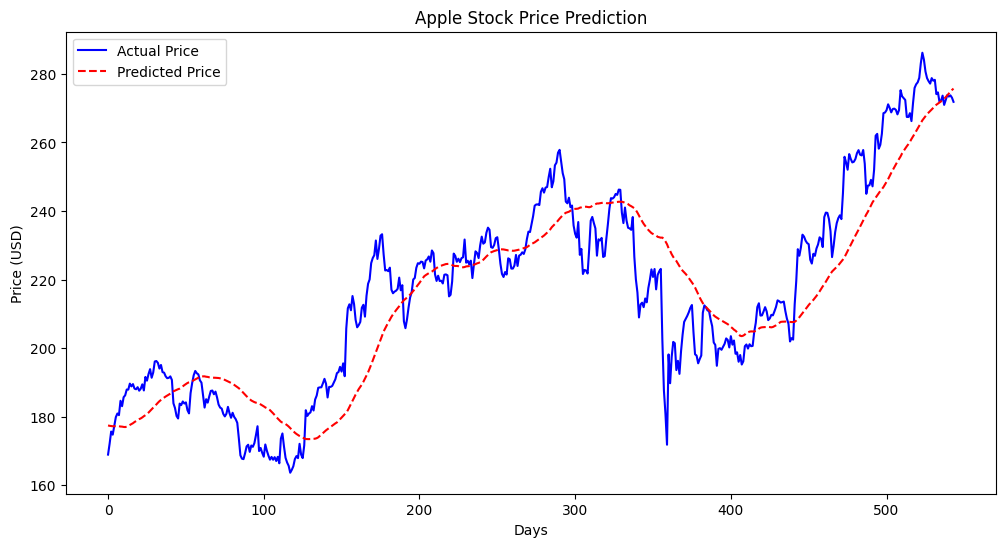

In [6]:
# Make predictions
predictions = model.predict(X_test)

# Plotting
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red', linestyle='--')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()